[极客教程-sympy](https://geek-docs.com/python/python-tutorial/python-sympy.html)

## 待学习  

[Sympy玩转逻辑符号运算](https://www.jianshu.com/p/039bfcac74c6)  
***


## 重要资料  
[用 Python 来研究数学 --- SymPy 符号工具包介绍](https://zhuanlan.zhihu.com/p/96738286?utm_source=wechat_session)  

## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'
%matplotlib inline

import numpy as np
import sympy
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
import random
from sympy import *
# from sympy.abc import * # 不要这么写因为gamma有重复
from sympy.plotting import plot
# 开启Latex语法
sympy.init_printing(use_latex=None)

In [43]:
# from sympy import pi, E, I, oo
# from sympy import simplify,exp,sqrt
from sympy.plotting import plot
x, y, z = symbols('x y z')
m, n, t = symbols('m n t')
f = Function("f")

# 数学基础

Rational值
***
SymPy 具有用于处理有理数的Rational。 有理数是可以表示为两个整数（分子 p 和非零分母 q）的商或分数 p / q 的任何数字。

In [30]:
from sympy import Rational

r1 = Rational(1/10)
r2 = Rational(1/10)
r3 = Rational(1/10)
val = (r1 + r2 + r3) * 3
r1
r2
val
val.evalf()
val2 = (1/10 + 1/10 + 1/10) * 3
val2

In [13]:
from sympy import Mul

a1 = sqrt(2)
b1 = sqrt(2)

Mul(a1,  b1, evaluate=False) 
# 'equals to '
a1 * b1

# 基本操作  

[5.2Python数据处理篇之Sympy系列(二)---Sympy的基本操作](https://www.cnblogs.com/zyg123/p/10539650.html)    
1. 符号的初始化与输出设置-symbol() symbols() latex()
    1. 作用：在sympy里进行符号运算之前，必须先定义sympy的符号，这样sympy才能识别该符号。.init_printing(use_latex=True)开启时，在jupyter运行时，输出的是LaTeX的格式
    2. 使用：latex()函数，同样返回LaTeX的格式。  
    3. 操作：  
        1. 单个符号的初始化：`x = sympy.Symbol('x')`   
        2. 多个符号的初始化：`x,y=sympy.symbol("x y")`
2. 替换符号-subs(old,new)
    1. 说明：sub是Substitution的简称，也就是替换，其有两个作用：  
        语法：expr.sub(old,new)  
        1. 数值替换：用数值替换符号，进行带入计算。  
        2. 符号替换：用一些符号替换符号。 
    2. 注意点：  
        1. 是否改变原表达式  
            subs()函数不改变原表达式，并且返回一个修改的表达式。  
        2. 替换多个表达式  
            当需要替换多个表达式时，可以在subs()里使用列表  
            如：`subs([(x,2), (y, 3), (z, 4)])`  
            表示：将x替换成2，y替换成3，z替换成4  

3. 将字符串变为sympy的表达式-sympify（）  
    1. 说明：不要混淆了sympify()函数与 simplify()函数，前者是转化，后者是简化。  

4. 数值计算-evalf()
    1. 说明：相当于python自带的eval()函数，只是进行的是float浮点数运算。 
    2. 操作：  
        1. 对于数值表达式的运算  
            直接使用.evalf()函数  
        2. 对于符号表达式的运算  
            对于表达式常用的是:`.evalf(subs={x: 2.4})`  
5. 自定义表达式-lambdify（）
    1. 说明：该函数有点类似于lambda(),用于自己构造一个函数表达  
    2. 源代码：  
        ```
        x = Symbol('x')
        a = np.arange(10)
        expr = x**2
        # 构造自己的函数
        f = lambdify(x, expr, "numpy")
        print(f(a))
        ```


In [93]:
x = Symbol('x')
a = np.arange(10)
expr = x**2
# 构造自己的函数
f = lambdify(x, expr, "numpy")
f(a)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

## Latex

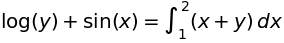

'\\log{\\left(y \\right)} + \\sin{\\left(x \\right)} = \\int\\limits_{1}^{2} \\left(x + y\\right)\\, dx'

\log{\left(y \right)} + \sin{\left(x \right)} = \int\limits_{1}^{2} \left(x + y\right)\, dx
\begin{cases} 1 & \text{for}\: x > 0 \\0 & \text{otherwise} \end{cases}


False

In [90]:
# 开启latex语法
x,y,z = symbols('x y z')
sympy.init_printing(use_latex=True)
a1 = Eq(sin(x) + log(y), Integral(x+y,(x,1,2)))
a2 = Piecewise((1,x>0),(0,True))
a1
latex(a1)
print(latex(a1))
# print_latex函数
print_latex(a2)
sympify("x**2+y**2==1")
sympify("x**2+y**2")

验证  
$\begin{cases} 1 & \text{for}\: x > 0 \\0 & \text{otherwise} \end{cases}$  


# 符号计算

## 定义符号和符号运算
* Symbol
* symbols 
* var: <font color=red>Create symbols and inject them into the global namespace.</font>
* 参数：  
    {'commutative': True, 'complex': True, 'hermitian': True, 'imaginary': False, 'negative': False, 'nonnegative':True, 'nonpositive': False, 'nonzero': True, 'positive': True, 'real': True, 'zero': False}   
    使用assumptions0 属性可以快速査看所有的假设条件，其中commutative为True表示此符号满足交换律，其余的假设条件根据英文名很容易知道它们的含义。

In [148]:
from sympy.abc import x,n
x>0
x1 = Symbol('x',positive=True)
x>0
x2 = var('x',negative=True)
x1>0
x2>0
x<0
n = symbols('n',integer=True)
n.assumptions0
x1.name # x

True

False

True

{'integer': True,
 'irrational': False,
 'noninteger': False,
 'imaginary': False,
 'transcendental': False,
 'complex': True,
 'rational': True,
 'algebraic': True,
 'commutative': True,
 'hermitian': True,
 'real': True}

'x'

In [147]:
x.is_Symbol # x 是一个符号
x.is_positive # x 是一个正数
x.is_imaginary # 因为x可以比较大小，所以它不是虚数
x.is_complex # x是一个复数，因为复数包括实数，而实数

True

False

False

True

In [32]:
from sympy import Symbol,symbols

In [33]:
x = Symbol('x')
a = Symbol('x')
x
2*x+1
2*a+1

In [34]:
x,y,z=symbols("x y z") # 要以空格或逗号分隔
x
y
z

## 简化表达式
* simplify()  
    * 简化表达式
    * 将字符串转化为数学表达式

In [36]:
from sympy import sin, cos
expr1 = sin(x) / cos(x)
simplify(expr1)
expr_str = "3*x*x+2*x*y+y*y"
simplify(expr_str)

## 比较表达式
* equals()

In [5]:
from sympy import sin, cos

x = Symbol('x')

a1 = cos(x)**2 - sin(x)**2
b1 = cos(2*x)

a1.equals(b1)
# we cannot use == operator
a1 == b1

True

False

## 求值表达式
* evalf()

In [38]:
pi.evalf()
pi.evalf(30)


## 用值代替符号
* subs()  
    subs(x,1)  
    subs({x:1})

* Float, Integer, Integers

In [5]:
x, y = symbols('x y')

expr = 3*x*x+2*x*y+y*y
expr1 = expr.subs({x:(1-y)})
expr.subs({x:2, y:3})

(1/x).evalf(subs={x: 0.3}, n=21) # n 总位数，精度不够
# (1/x).subs({x: 3.0})
# (1/x).subs({x: 3.0}, n=21)# 位数不足，与上面相同
# (1/x).subs({x: 3.0}).evalf(21)# 不好
expr1
simplify(expr1)
expr1.subs(y,1)

33

3.33333333333333345669

y**2 + 2*y*(1 - y) + 3*(1 - y)**2

2*y**2 - 4*y + 3

1

## 区间操作
* Interval

In [138]:
from sympy import Interval, Union, Intersection,Complement,UniversalSet,EmptySet,S

I1 = Interval(0, 1) # 闭集
I2 = Interval.open(0, 1) # 开集
Interval(0,1 , right_open=True) # 左闭右开
Interval(0,1 , left_open=True) # 左开右闭
# 其开始和结束的点可以分别使用 start 和 end 来表示
I1.start
I1.end
# 其闭包用 closure 来表示
I2.closure 
# 其内点用 interior 来表示
I1.interior
# 判断其边界条件可以使用 left_open 或者 right_open 来做
I1.left_open
I1.right_open
# 其长度用 measure 来表示
I1.measure 

False

False

In [112]:
Interval(0, 1).complement(S.Reals)
0.5 in Interval(0, 1)
Union(Interval(0, 1), Interval(2, 3)).sup
Union(Interval(0, 1), Interval(2, 3))
Intersection(Interval(0, 1), Interval(1, 3))
Interval(1, 3).intersect(Interval(1, 2))
Complement(Interval(1, 3), Interval(1, 2))
Interval(1, 2).complement(Interval(1, 3)) # 注意顺序
Interval(1, 3).complement(Interval(1, 2)) 
S.Integers.intersect(Interval(-4, 4))
Interval(-4, 4).complement(S.Integers)
Interval(0, 1).measure # 勒贝格常数
Union(Interval(0, 1), Interval(2, 3)).measure

True

ℤ \ [-4, 4]

In [42]:
# infimum 下确界.inf
Interval(0, 1).inf
# supremum 上确界
Interval(2, 3).sup
1 in Interval(0, 1).interior
Interval(0, 1).closure # 闭集
Interval(0, 1).interior  # 开集
Interval(0, 1).boundary # 边界
Interval(0, 1).boundary.interior

False

## 表达式乘法
* \*号

In [43]:
expr1 = x**2+2*x
expr2 = x**3+2*x**2+3*x
expr = expr1*expr2
expr
simplify(expr)
expand(expr)

## 使表达式整齐输出
* pprint()
* pretty()

In [44]:
from sympy import pprint, init_printing, pretty
init_printing(use_unicode=True) # 对于某些字符，我们需要启用 unicode 支持。
expr = x*x+2*x*y+y*y
expr
pprint(expr)
pretty(expr) # 不太好用

 2            2
x  + 2⋅x⋅y + y 


' 2            2\nx  + 2⋅x⋅y + y '

In [45]:
from sympy import init_printing
expr = 1+2*x+2*x**2
# pprint(expr)
init_printing(order="grlex") # 有问题，没什么作用
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


## 运算符和函数  
SymPy重新定义了所有的数学运算符和数学函数。例如Add类表示加法，Mul类表示乘法，而Pow类表示指数运算，sin类表示正弦函数。和Symbol对象一样，这些运算符和函数都从__Basic__类继承，可在IPython中查看它们的继承列表(例如:Add.mro())。可以使用这些类创建复杂的表达式：

### Add, Mul, args, func

In [149]:
from sympy import Add,  Mul
x,y,z,m,n = symbols("x y z m n")
Add(x,y)
Mul(x,y)
Add(x,y,z)
Add(Mul(x,y,z), Pow(x,y), sin(z))


在Basic类中定义了两个很重要的属性：func和args。func属性得到对象的类，而args得到其参数。使用这两个属性可以观察SymPy所创建的表达式。 SymPy没有减法运算类，下面看看减法运算所得到的表达式：

In [151]:
t1 = x - y
t1.func # 减法运算用加法类Add表示
# sympy.core.add.Add 
t1.args # 两个加数一个是x，一个是-y 
# (x, -y)
t1.args[1].func # -y是用Mul表示的
# sympy.core.mul.Mul 
t1.args[1].args 
# (-1, y)

sympy.core.add.Add

sympy.core.symbol.Symbol

sympy.core.mul.Mul

除了使用SymPy中预先定义好的具有特殊运算含义的数学函数之外，还可以使用Function()创建自定义的数学函数：

In [157]:
f1 = Function("f")
f1
isinstance(f1, Function)

f

False

当我使用f创建一个表达式时，就相当于创建它的一个实例：

In [158]:
t1 = f1(x,y)
t1
isinstance(t1, Function)
# True
type(t1) 
# f 
t1.func # （其中func和args是Basic类的两个非常
# 重要的属性，分别表示对象的类和对象的参数）
# f 
t1.args 
# (x, y)

True

f

f

f的实例t可以参与表达式运算：

In [155]:
t1+t1**2

### atom

In [57]:
(1 + x + 2 * sin(y + I * pi)).atoms()
# {1, 2, I, pi, x, y}
from sympy import Number, NumberSymbol, Symbol
(1 + x + 2 * sin(y + I * pi)).atoms(Symbol)
# {x, y}
(1 + x + 2 * sin(y + I * pi)).atoms(Number)
# {1, 2}
(1 + x + 2 * sin(y + I * pi)).atoms(Number, NumberSymbol)
# {1, 2, pi}
(1 + x + 2 * sin(y + I * pi)).atoms(Number, NumberSymbol, I)
# {1, 2, I, pi}

### series

In [60]:
cos(x).series()
# 1 - x**2/2 + x**4/24 + O(x**6)
cos(x).series(n=4)
# 1 - x**2/2 + O(x**4)
cos(x).series(x, x0=1, n=2)
# cos(1) - (x - 1)*sin(1) + O((x - 1)**2, (x, 1))
"***"
e1 = cos(x + exp(y))
e1
e1.series(y, n=2)
# cos(x + 1) - y*sin(x + 1) + O(y**2)
e1.series(x, n=2)
# cos(exp(y)) - x*sin(exp(y)) + O(x**2)

'***'

### nseries

In [63]:
sin(x).nseries(x, 0, 6)
# x - x**3/6 + x**5/120 + O(x**6)
log(x+1).nseries(x, 0, 5)
# x - x**2/2 + x**3/3 - x**4/4 + O(x**5)

The optional `logx` parameter can be used to replace any log(x) in the returned series with a symbolic value to avoid evaluating log(x) at 0. A symbol to use in place of log(x) should be provided.

In [65]:
e1 = sin(log(x))
# e1.nseries(x, 0, 6) # Asymptotic expansion of sin around [-oo] is not implemented.
logx = Symbol('logx')
e1.nseries(x, 0, 6, logx=logx)

In [67]:
e1 = x**y
e1.nseries(x, 0, 2)
# O(log(x)**2)
e1.nseries(x, 0, 2, logx=logx)
# exp(logx*y)

### replace

In [54]:
f1 = log(sin(x)) + tan(sin(x**2))
f1.replace(sin, cos)
# log(cos(x)) + tan(cos(x**2))
sin(x).replace(sin, cos, map=True)
# (cos(x), {sin(x): cos(x)})
(x*y).replace(Mul, Add)
# x + y
f1.replace(sin, lambda arg: sin(2*arg))
# log(sin(2*x)) + tan(sin(2*x**2))
(x*y).replace(Mul, lambda *args: sin(2*Mul(*args)))
# sin(2*x*y)
"***"
a, b = map(Wild, 'ab')
f1.replace(sin(a), tan(a))
# log(tan(x)) + tan(tan(x**2))
f1.replace(sin(a), tan(a/2))
# log(tan(x/2)) + tan(tan(x**2/2))
f1.replace(sin(a), a)
# log(x) + tan(x**2)
(x*y).replace(a*x, a)
# y
(2*x + y).replace(a*x + b, b - a)
# y - 2
(2*x).replace(a*x + b, b - a)
# 2*x
(2*x).replace(a*x + b, b - a, exact=False)
# 2/x
f1.replace(sin(a), lambda a: sin(2*a))
# log(sin(2*x)) + tan(sin(2*x**2))


'***'

In [56]:
g1 = 2*sin(x**3)
g1.replace(lambda expr: expr.is_Number, lambda expr: expr**2)
# 4*sin(x**9)

In [55]:
(x*y).is_Mul
e1 = x*(x*y + 1)+x
e1
e1.replace(lambda x: x.is_Mul, lambda x: 2*x)
# 2*x*(2*x*y + 1)

True

### rewite

In [53]:
sin(x).rewrite(sin, exp)
cos(x).rewrite(cos, exp)
exp(x).rewrite(exp,cos)
exp(x).rewrite(exp,cos)
sin(x).rewrite([sin, ], exp)

### primitive

In [62]:
(3*(x + 1)**2)
(3*(x + 1)**2).primitive()

a = (6*x + 2); a.primitive()
b = (x/2 + 3); b.primitive()
(a*b).primitive()
(a*b).primitive() == (1, a*b)


True

### 分解和展开表达式
* fractor(): 分解表达式
* expand(): 展开表达式  

factor()可以对多项式表达式进行因式分解

In [35]:
from sympy import factor,expand
x,y=symbols("x y")
expr = x**2-y**2
factors = factor(expr)
factors
expand(factors)

In [26]:
factor(15*x**2+2*y-3*x-10*x*y)
# (3*x - 2*y)*(5*x - 1) 
factor(expand((x+y)**20))
# (x + y)**20

### collect()  
收集表达式中指定符号的有理指数次幂的系数

In [28]:
a,b=symbols('a,b')
eq = (1+a*x)**3 + (1+b*x)**2
# 首先需要对表达式eq进行展开，得到的表达式eq2是一系列乘式的和
eq2 = expand (eq)
eq2
# 然后调用collect(),对表达式eq2中X的幂的系数进行收集
collect(eq2,x)

默认情况下，collect()返回的是一个整理之后的表达式，如果我们希望得到x的各次幂的系数，可以设置evaluate参数为False,让它返回一个以X的幂为键、值为系数的字典

In [33]:
p = collect(eq2, x, evaluate=False)
p
# 常数项，注意需要用SymPy中的数值1,或者使用p[x**0]
p[1]
p[S(1)] 
p[x**0]
# 2
p[x**2] # x的2次项系数
# b**2 + 3*a**2
type(S(1)) # sympy.core.numbers.One

sympy.core.numbers.One

collect()也可以收集表达式的各次幂的系数，例如下面的程序收集表达式“sin(2*x)”的系数

In [34]:
collect(a*sin(2*x) + b*sin(2*x), sin(2*x))
# (a + b)*sin(2*x)

### 阶乘factorial

In [ ]:
# 阶乘factorial
f = factorial(x)
f
f.subs(x,4)

### 组合数binomial

In [7]:
# 组合数binomial
b1 = binomial(n,m)
b1
b1.subs({n:4,m:2})

### 求和

In [133]:
# 求和
n = sympy.Symbol("n", integer=True)
Sum(1/n, (n,1,sympy.oo)).is_convergent()
Sum(1/n**2, (n,1,sympy.oo)).is_convergent()
Sum(1/n**2, (n,1,sympy.oo)).evalf()
Sum(1/n**2, (n,1,sympy.oo)).doit()
sympy.Sum(1/n**3, (n,1,sympy.oo)).evalf()
sympy.Sum(1/n**3, (n,1,sympy.oo)).doit() # zeta(3)


False

True

### 连乘

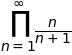

False

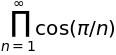

True

In [131]:
# 连乘
Product(n/(n+1), (n,1,sympy.oo))
Product(n/(n+1), (n,1,sympy.oo)).is_convergent()
Product(sympy.cos(sympy.pi/n), (n, 1, sympy.oo))
Product(sympy.cos(sympy.pi/n), (n, 1, sympy.oo)).is_convergent()


### 整数次方分解factorint

In [4]:
# factorint 整数次方分解
factorint(120)
factorint(24)
factorint(12)

{2: 3, 3: 1, 5: 1}

{2: 3, 3: 1}

{2: 2, 3: 1}

### 最大最小Max, Min

In [10]:
# Max, Min
Max(x,0)
Max(x,0).subs(x,1)

Max(0, x)

1

### 模式匹配matche/matches  


使用.matches()方法：前匹配后

In [25]:
from sympy import symbols, Wild, Basic
a, b, c = symbols('a b c')
x1 = Wild('x')
x1
Basic(a + x1, x1).matches(Basic(a + b, c)) is None
Basic(a + x1, x1).matches(Basic(a + b + c, b + c))
Basic(a*x1**2).matches(Basic(a*c**2))

True

使用.match()方法，和Wild类对表达式实行模式匹配。这个方法将返回一个发生替换的字典  
后匹配前

In [20]:
from sympy import Symbol, Wild 
x = Symbol('x') 
p = Wild('p') 
(5*x**2).match(p*x**2)
Basic(a*x**2,x).matches(Basic(p*x**2,x))
# {p_: 5}
q = Wild('q') 
(x**2).match(p*x**q)

如果匹配失败，将返回None

In [12]:
print((x+1).match(p**x)) # 必须要用print，否则None不显示

None


可以指定Wild类的排除参数去保证一些东西不出现在结果之中

In [14]:
p = Wild('p', exclude=[1,x]) 
print((x+1).match(x+p)) # 1 is excluded 
# None 
print((x+1).match(p+1)) # x is excluded 
# None 
print((x+1).match(x+2+p)) # -1 is not 
# excluded {p_: -1}

None
None
{p_: -1}


### 其它

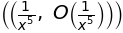

In [47]:
from sympy import add, mul, div
from sympy.abc import a, x, y
# help(add)
(3*y+7 + 3*x +4*x*y).as_coeff_add()
(3*x + a*x + 4).as_coefficients_dict() # 系数字典
(3*x +3 + 3*sqrt(2)).as_content_primitive()
(7 + 9*I).as_real_imag()
(3*x - 2*y + 5).as_two_terms()
(x + 1 + 1/x**5).extract_leading_order(x)
(2*x + 4*y).primitive()
((2 + 2*x)*x + 2).as_content_primitive()

In [49]:
from sympy import summation, factorial

In [78]:
n = symbols('n')
# 求和
s = summation(1 / factorial(n), (n, 1, 100))
s.evalf()
# print(s.evalf())
# 阶乘
a = factorial(5)
# print(a)
# evalf
a = sympy.Symbol('a')
(1 / a).evalf(subs={a: 3}, n=10)
# print((1 / a).evalf(subs={a: 3}, n=10))  # 值代换，保留小数位数

# 欧拉公式和复数
# E**(I*pi) + 1
x = symbols("x", real=True)
y = expand(E ** (I * x), complex=True)
x
y

## 方程和不等式
sympy.Eq()函数将两个表达式分别放在等号两边，组成方程  
* lhs：式子的左边
* rhs：式子的右边
* rel_op：式子的关系

In [62]:
x, y, z = symbols('x y z')
a1 = Eq(x + y, z)
a2 = Unequality(x + y, z)
a3 = Equality(x + y, z)
a4 = GreaterThan(x + y, z)
a5 = LessThan(x + y, z)
a6 = StrictGreaterThan(x + y, z)
a7 = StrictLessThan(x + y, z)
a1, a2, a3, a4, a5, a6, a7
a1.lhs, a2.lhs, a3.lhs, a4.lhs, a5.lhs, a6.lhs, a7.lhs
a1.rhs, a2.rhs, a3.rhs, a4.rhs, a5.rhs, a6.rhs, a7.rhs
a1.rel_op, a2.rel_op, a3.rel_op, a4.rel_op, a5.rel_op, a6.rel_op, a7.rel_op

('==', '!=', '==', '>=', '<=', '>', '<')

[ref:Sympy 基础](https://blog.csdn.net/myjiayan/article/details/43057985)

In [63]:
import sympy
# 开启Latex语法
sympy.init_printing(use_latex=True)
u_max, u_star, rho_max, rho_star, A, B = sympy.symbols(
    'u_max u_star rho_max rho_star A B')
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

eq1
eq2
eq3

In [68]:
eq2-3*eq3
# sympy直接将这个字符串打印出来了，而没有转化为方程。这时候，应该利用sympy.Eq()函数创建新的方程：
eq2.lhs
eq2.rhs
eq2.rel_op
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4


'=='

In [70]:
eq4.simplify() # 化简
eq4.expand() # 展开
solve(eq4,rho_star) # 解方程
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

In [74]:
# 关闭Latex语法
sympy.init_printing(use_latex=False)
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq1

# 数值计算

## 数值  
为了实现符号运算，在SymPy内部有一整套数值运算系统。因此SymPy的数值和Python 的整数、浮点数是完全不同的对象。为了使用方便，SymPy会尽量自动将Python的数值类型转换为SymPy的数值类型。此外，SymPy提供了一个S对象用于进行这种转换。在下面的例子中，当有SymPy的数值参与计算时，结果将是SymPy的数值对象

In [39]:
from sympy import Float, Integer, Integers, S
Float("3.14")
Integer("3")
type(Float("3.14"))
# help(Integers)
S.Reals
S.Integers
S.Zero
S.UniversalSet
S.Pi
S.One
S.Infinity

sympy.core.numbers.Float

### round

In [61]:
S(10.5).round()
pi.round()
pi.round(2)
(2*pi + E*I).round()
(2*pi + I/10).round()
(pi/10 + 2*I).round()
(pi/10 + E*I).round(2)


# 简化操作  
[5.3Python数据处理篇之Sympy系列(三)---简化操作](https://blog.csdn.net/weixin_34025151/article/details/92949586)  
***

1. 有理数与多项式的简化  
    1. 最简化-simplify（）  
    2. 展开-expand（）  
    3. 提公因式-factor（）  
    4. 合并同类项-ceiling（）  
    5. 简化分式-cancel（）  
    6. 分式展开-apart（）  
2. 三角函数的简化  
    1. 三角形的简化-trigsimp（）
    2. 三角形的展开-expand_trig()
3. 指数函数的简化  
    1. 指数的合并一-powsimp()
    2. 指数的合并二-powdenest()
    3. 指数的展开：-expand_power_exp\expand_power_base
4. 对数函数的简化  
    1. 对数的简化-logcombine()  
    2. 对数的展开-expand_log()
5. 其他函数的简化  
    1. 阶乘与排列组合-factorial()\binomial()

## 有理数与多项式的简化


### 最简化-simplify（）  
simplify（）是尽可能的让表达式最简化，其最简化的形式是不定的。

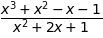

In [222]:
x = Symbol('x')
 
expr1 = cos(x)**2+sin(x)**2
 
expr2 = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
 
# 简化表达式
r1 = simplify(expr1)
r2 = simplify(expr2)
expr1
expr2
r1
r2

### 展开-expand（）  
expand()是对括号里的多项式进行展开。  
expand()通用的展开运算，根据用户设置的标志参数对表达式进行展幵。  
* 默认情况下，以下的标志参数为 True。
    * mul：展开乘法
    * log:展开对数函数参数中的乘积和幂运算
    * multinomial:展开加法式的整数次幂
    * power_base:展开幂函数的底数乘积
* 以下标志参数默认为False
    * complex:展开复数的实部和虚部，默认不展开复数的实部和虚部
    * func:对一些特殊函数进行展开
    * trig:展开三角函数
* expand_log()、expand mul()、expand_complex()、expand_trig()、expand_func()等函数则通过将相应的标志参数设置为True,对expand()进行封装。

In [171]:
# mul：展开乘法 ?
# log:展开对数函数参数中的乘积和幂运算
expand(log(x*y**2)) # ? 
# multinomial:展开加法式的整数次幂
expand((x+y)**3)
# power_base:展开幂函数的底数乘积
expand(x**(y+z))


In [174]:
from sympy import gamma
# complex:展开复数的实部和虚部，默认不展开复数的实部和虚部
expand(x*y, complex=True)
# func:对一些特殊函数进行展开
expand (gamma(1+x),func=True)
# trig:展开三角函数
expand(sin(x+y), trig=True)

In [223]:
x = Symbol('x')
 
expr1 = (x+1)**2
expr2 = ((x + 1)*(x - 2) - (x - 1)*x)
 
# 展开
r1 = expand(expr1)
r2 = expand(expr2)
expr1
expr2
r1
r2

### 提公因式-factor（）  
factor（）是对展开的多项式进行提公因式

In [224]:
x = Symbol('x')
 
expr1 = (x ** 3 - x ** 2 + x - 1)
 
# 提公因数
r1 = factor(expr1)
expr1 
r1
latex(expr1)
latex(r1)


'x^{3} - x^{2} + x - 1'

'\\left(x - 1\\right) \\left(x^{2} + 1\\right)'

$\left(x - 1\right) \left(x^{2} + 1\right)$

### 合并同类项-ceiling（）  
对于多项式进行合并同类项

In [225]:
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
 
expr1 = x*y + x - 3 + 2*x**2 - z*x**2 + x**3 + y**2
expr2 = x**3+x*2-3*x**2+x**3-x**2+x*4-5
 
# 合并同类项
r1 = ceiling(expr1)
r2 = ceiling(expr2)
expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

'x^{3} - x^{2} z + 2 x^{2} + x y + x + y^{2} - 3'

'\\left\\lceil{x^{3} - x^{2} z + 2 x^{2} + x y + x + y^{2}}\\right\\rceil - 3'

'2 x^{3} - 4 x^{2} + 6 x - 5'

'\\left\\lceil{2 x^{3} - 4 x^{2} + 6 x}\\right\\rceil - 5'

### 简化分式-cancel（）  
cancle既有约分又有简化的作用  
cancel()对分式表达式的分子分母进行约分运算，可以对纯符号的分式表达式以及自定义函数表达式进行约分，但是不能对内部函数的表达式进行约分

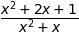

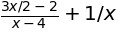

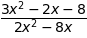

'\\frac{x^{2} + 2 x + 1}{x^{2} + x}'

'\\frac{x + 1}{x}'

'\\frac{\\frac{3 x}{2} - 2}{x - 4} + \\frac{1}{x}'

'\\frac{3 x^{2} - 2 x - 8}{2 x^{2} - 8 x}'

In [226]:
x = Symbol('x')
 
expr1 = (x**2 + 2*x + 1)/(x**2 + x)
expr2 = 1/x + (3*x/2 - 2)/(x - 4)
 
# 约分消去分式的公因数
r1 = cancel(expr1)
 
# 简化分式
r2 = cancel(expr2)

expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

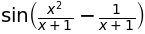

In [163]:
cancel((x**2-1)/(1+x))
x-1
cancel(sin((x**2-1)/(1+x))) # cancel不能对函数内部的表达式进行约分
# sin(x**2/(x + 1) - 1/(x + 1))
cancel((f(x)**2-1)/(f(x)+1)) # #能对自定义函数表达式进行约分
# f(x) - 1

### 分式展开-apart（）  
原本只有一项的分式表达式，展开为多项的分式表达式。

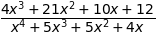

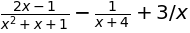

'\\frac{4 x^{3} + 21 x^{2} + 10 x + 12}{x^{4} + 5 x^{3} + 5 x^{2} + 4 x}'

'\\frac{2 x - 1}{x^{2} + x + 1} - \\frac{1}{x + 4} + \\frac{3}{x}'

In [227]:
x = Symbol('x')
 
expr1 = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
 
# 对于分式进行展开
r1 = apart(expr1)
expr1 
r1
latex(expr1)
latex(r1)

### 分式合并-together（）  
原本多项的分式表达式，合并为只有一项的分式表达式。

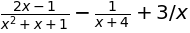

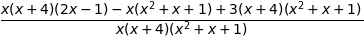

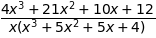

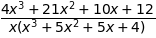

In [228]:
expr1 = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
r1 = apart(expr1)
r2 = together(r1)
r1
r2
r1.simplify()
r2.simplify()

### 其它

radsimp()对表达式的分母进行有理化，它所得到的表达式的分母部分将不含无理数。

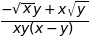

In [159]:
radsimp(1/(sqrt(5)+2*sqrt(2)))
radsimp(1/(y*sqrt(x)+x*sqrt(y)))

ratsimp()对表达式中的分母进行通分运算，即将表达式转换为分子除分母的形式

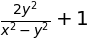

In [160]:
ratsimp(x/(x+y)+y/(x-y))

fraction()返回一个包含表达式的分子和分母的元组,用它可以获得ratsimp()通分之后的分子或分母  
注意fraction()不会自动对表达式进行通分运算

In [162]:
fraction(ratsimp(1/x+1/y))
fraction(1/x+1/y)

## 三角函数的简化


### 三角形的简化-trigsimp（）  
使用trigsimp（）可以简化三角函数，反三角函数也可以。  
trigsimp()对表达式中的三角函数进行化简。它有两个可选参数--deep和recursive，默认值都为False。当deep参数为True时，将对表达式中的所有子表达式进行简化运算；当recursive参数为True时，将递归使用trigsimp()进行最大限度的化简

In [229]:
x = Symbol('x')
 
expr1 = sin(x)**2+cos(x)**2
expr2 = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
 
# 进行三角形简化
r1 = trigsimp(expr1)
r2 = trigsimp(expr2)
 
expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

'\\sin^{2}{\\left(x \\right)} + \\cos^{2}{\\left(x \\right)}'

'1'

'\\sin^{4}{\\left(x \\right)} - 2 \\sin^{2}{\\left(x \\right)} \\cos^{2}{\\left(x \\right)} + \\cos^{4}{\\left(x \\right)}'

'\\frac{\\cos{\\left(4 x \\right)}}{2} + \\frac{1}{2}'

In [164]:
trigsimp(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)
# sin(2*x) + 1 
trigsimp(f(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)) 
# 也能对自定义函数中的三角函数化简，至今不知道deep和recursive是干嘛的
# f(sin(2*x) + 1)

### 三角形的展开-expand_trig()  
使用expand_trig()可以展开三角函数，同样反三角函数也可以。  
expand_trig()可以对三角函数的表达式进行展开。它实际上是对expand()的封装，通过将expand()的trig参数设置为True,实现三角函数的展开计算。输入“expand_trig??” 来査看它调用expand()时的参数

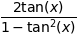

'\\sin{\\left(x + y \\right)}'

'\\sin{\\left(x \\right)} \\cos{\\left(y \\right)} + \\sin{\\left(y \\right)} \\cos{\\left(x \\right)}'

'\\tan{\\left(2 x \\right)}'

'\\frac{2 \\tan{\\left(x \\right)}}{1 - \\tan^{2}{\\left(x \\right)}}'

In [230]:
x = Symbol('x')
y = Symbol('y')
 
expr1 = sin(x+y)
expr2 = tan(2*x)
 
# 三角形的展开
r1 = expand_trig(expr1)
r2 = expand_trig(expr2)

expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

## 指数函数的简化

### 指数的合并一-powsimp()  
powsimp()主要用于同底数或者同指数

In [71]:
# 假设x与y是正值， a 是实数值
m = Symbol('m', positive=True) # 底数要设为正数
n = Symbol('n', positive=True)
a = Symbol('a', real=True)
b = Symbol('b', real=True)
# a = Symbol('a', positive=True)
# b = Symbol('b', positive=True)
 
expr1 = m**a*m**b
expr2 = m**a*n**a
 
# 进行指数的合并，如果不符合，则不进行简化
r1 = powsimp(expr1)
r2 = powsimp(expr2)

expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

'm^{a} m^{b}'

'm^{a + b}'

'm^{a} n^{a}'

'\\left(m n\\right)^{a}'

### 指数的合并二-powdenest()  
powdenest()主要用于只有一个底数的不同指数。(没有什么作用)

In [232]:
expr1 = (x**a)**b
expr2 = (((x**2)**a)**b)
 
# 进行指数的合并，如果不符合，则不进行简化
r1 = powdenest(expr1)
r2 = powdenest(expr2)
print(expr1)
print(r1)
expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

x**(a*b)
x**(a*b)


'x^{a b}'

'x^{a b}'

'x^{2 a b}'

'x^{2 a b}'

### 指数的展开：-expand_power_exp\expand_power_base  
1. expand_power_exp()用于同底数的展开
2. expand_power_base()用于同指数的展开

In [233]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)
a = Symbol('a', real=True)
b = Symbol('b', real=True)
 
expr1 = x**(a+b)
expr2 = (x*y)**a
 
# 进行指数的展开
# 底数相同展开
r1 = expand_power_exp(expr1)
 
# 指数相同展开
r2 = expand_power_base(expr2)

expr1
expr2
r1
r2
latex(expr1)
latex(r1)
latex(expr2)
latex(r2)

'x^{a + b}'

'x^{a} x^{b}'

'\\left(x y\\right)^{a}'

'x^{a} y^{a}'

## 对数函数的简化

### 对数的简化-logcombine()  
logcombine()用于合并对数。

In [234]:
# 假设 x与y 是正值， a 是真实的值
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)
n = Symbol('n', real=True)
 
expr1 = log(x) + log(y)
expr2 = log(x) - log(y)
expr3 = n*log(x)
 
# 对于对数的展开
r1 = logcombine(expr1)
r2 = logcombine(expr2)
r3 = logcombine(expr3)

expr1
expr2
expr3
r1
r2
r3

### 对数的展开-expand_log（）  
expand_log（）用于对数的展开。

In [235]:
# 假设 x与y 是正值， a 是真实的值
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)
n = Symbol('n', real=True)
 
expr1 = log(x*y)
expr2 = log(x/y)
expr3 = log(x**n)
 
# 对于对数的展开
r1 = expand_log(expr1)
r2 = expand_log(expr2)
r3 = expand_log(expr3)

expr1
expr2
expr3
r1
r2
r3

## 其他函数的简化

### 阶乘与排列组合-factorial()\binomial()  
1. factorial()用于求阶乘
2. binomial()用于求排列组合

In [10]:
n,m = symbols("n m")
 
# 求阶乘
r1 = factorial(n)
r2 = factorial(3)
b1 = binomial(n,m)
b2 = binomial(4,2)
r1
r2
b1
b2
latex(r1)
latex(b1)

n!

6

⎛n⎞
⎜ ⎟
⎝m⎠

6

'n!'

'{\\binom{n}{m}}'

# 序列
* sequence()

In [51]:
from sympy import sequence
n = Symbol('n')
s = sequence(x**2, (x, 1, 10))
s
list(s)
s.formula
s.start
s.stop
s.length
summation(s.formula, (x, s.start, s.stop))
s1 = sequence((1, 2, 3, 4), (n, 0, 6))
list(s1)


* SeqPer

In [52]:
from sympy import SeqPer
k = sympy.symbols('k')
s = SeqPer((k,k**2,k**3),(k,1,oo))
s
s.periodical # 周期序列
s.period # 周期序列长度
s.coeff(2) # 在自变量取特定值时的值
s1 = SeqPer((1,2,3),(k,1,10))
s1[:]

* SeqFormula

In [53]:
from sympy import SeqFormula
n = Symbol('n')
s = SeqFormula(n**3,(n,-oo,0))
s
s.formula
# s[:]

In [54]:
sequence((n,n**2,n**3), (n, 1, 10))
SeqPer((k,k**2,k**3),(k,1,oo))
SeqFormula((n**2,n**3),(n,-oo,0))

In [55]:
from sympy import SeqAdd
SeqAdd(SeqPer((1, 2), (n, 0, oo)), S.EmptySequence)
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqPer((1, 2), (n, 3, oo)))
# SeqPer((1, 2), (n, 0, 5))
# SeqPer((1, 2), (n, 4, 10))
SeqAdd(SeqPer((1, 2), (n, 0, 5)), SeqPer((1, 2), (n, 4, 10)))
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2, (n, 0, oo)))
SeqAdd(SeqFormula(n ** 3), SeqFormula(n ** 2))
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2, (n, 0, oo)))

In [56]:
from sympy import SeqMul
SeqMul(SeqPer((1, 2), (n, 0, oo)), S.EmptySequence)
SeqMul(SeqPer((1, 2), (n, 0, 5)), SeqPer((1, 2), (n, 5, 10)))
SeqMul(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2))
SeqMul(SeqFormula(n ** 3), SeqFormula(n ** 2))


# 函数

## 常见函数

* 误差函数erf()
    $$erf(x)=\frac{2}{\sqrt{\pi}} \int_0^x {e^{-\eta^{2}} d\eta}$$
* 正弦积分函数Si()
    $$Si(x)=\int_0^x{\frac{\sin(t)}{t}dt}\quad x>0$$
* 伽玛函数gamma()
    $$Gamma(x)=\int_0^\infty{t^{x-1}e^{-t}dx\quad(x>0)}$$

In [42]:
# from sympy import erf, Si, gamma
#误差函数
erf(x)
erf(0.5).evalf(n=10)
#正弦积分函数
Si(x)
Si(1).evalf(n=10)
#伽玛函数
gamma(x)
gamma(5)

## 分段函数
* Piecewise
    1. args
    2. func

In [59]:
from sympy import Piecewise, pi
x = symbols('x')

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > 1 ∨ x < -1

Piecewise

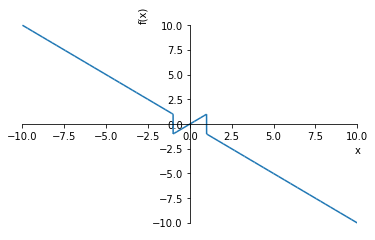

In [68]:
f1 = Piecewise((x,(x>-1) & (x<1)),(-x,(x<-1) | (x>1))) 
f1
f1.args
f1.func
plot(f1)

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > -3 ∧ x < 0

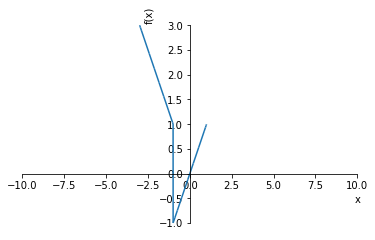

In [61]:
f1 = Piecewise((x,(x>-1) & (x<1)),(-x,(x<0) & (x>-3))) # 区间有重叠不报错，但不对
f1
plot(f1)


In [62]:
f1 = Piecewise((1,x>0),(0,(x>=0) & (x<=0)),(-1,x<0)) # ==无效，改用集合交集表示

# f = Piecewise((1,x>0),(0,(x==0)),(-1,x<0)) # ==无效
f1
# plot(f) # 带有一个点的分段函数无法这样plot
f1.subs({x:0}) # 分段函数取值

⎧1   for x > 0
⎪             
⎨0   for x = 0
⎪             
⎩-1  for x < 0

⎧0   for x < -1
⎪              
⎪ x            
⎨ℯ   for x ≤ 1 
⎪              
⎪x   otherwise 
⎩              

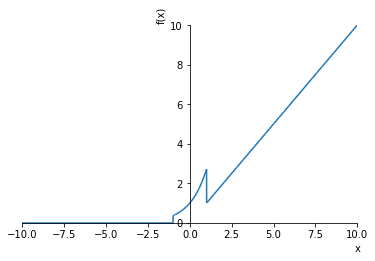

In [63]:
f1 = x
# g = log(x) # 无法plot
g1 = exp(x)
p1 = Piecewise((0, x < -1), (g, x <= 1), (f, True)) # True代表otherwise
p1
plot(p1)

## sympy包绘图

#### 颜色参数 

参数|对应的颜色
:---:|:---:
b|蓝色
g|绿色
r|红色
c|青色
m|品红色
y|黄色
k|黑色
w|白色

### 单函数图形绘制

In [68]:
from sympy.plotting import plot
x = Symbol('x')

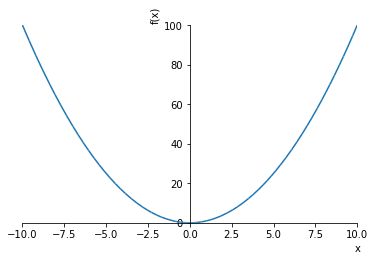

In [69]:
plot(x**2)

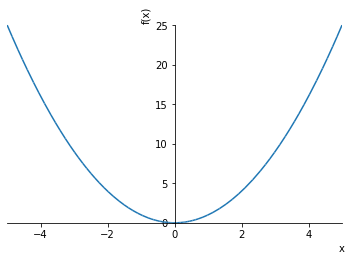

In [70]:
y = x**2
plot(y,(x,-5,5))

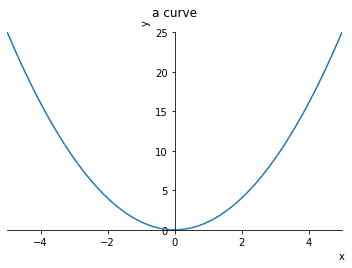

In [71]:
plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=True)

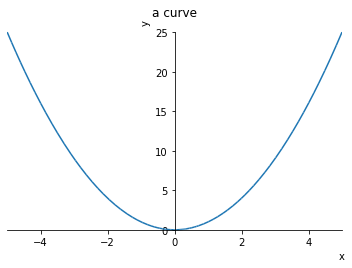

In [72]:
# 保存
p = plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=False)
p.save(r"./saves/curve.png")

### 多函数图形绘制

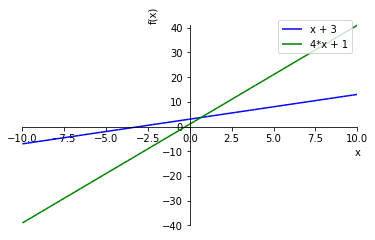

In [9]:
p = plot(x+3,4*x+1,legend=True,show=False)
p[0].line_color='b'
p[1].line_color='g'
p.show()
# dir(p)
# dir(p[0]) # 查看对象属性

In [74]:
from sympy import log,exp,power

log 不能作图

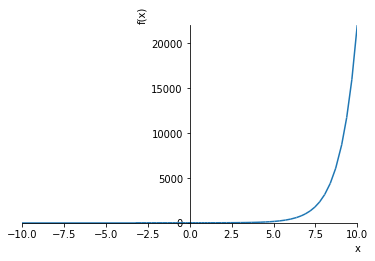

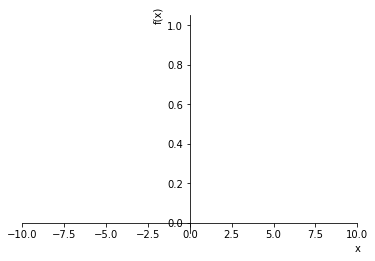

In [75]:
log(x)
plot(exp(x))
plot(log(x))

In [76]:
solve(log(x)-4)

## 解单变量不等式


### 解不等式1  
solve_poly_inequality

In [90]:
from sympy import Poly, solve_poly_inequality
ineq_obj = -x**2+4<0
# dir(inen_obj)
ineq_obj
lhs = ineq_obj.lhs
rel = ineq_obj.rel_op
p = Poly(lhs, x)
p
lhs
rel
solve_poly_inequality(p,rel)


'<'

In [91]:
from sympy import Poly, solve_rational_inequalities
ineq_obj = ((x-1)/(x+2))>0
# dir(inen_obj)
lhs = ineq_obj.lhs
numer,denom = lhs.as_numer_denom()
p1 = Poly(numer)
p2 = Poly(denom)
rel = ineq_obj.rel_op
lhs
rel
p1
p2
solve_rational_inequalities([[((p1,p2),rel)]])

'>'

### 解不等式2  
* solve_univariate_inequality  
* 参数：  
    expr : Relational
        The target inequality
    gen : Symbol
        The variable for which the inequality is solved
    relational : bool
        A Relational type output is expected or not
    domain : Set
        The domain over which the equation is solved
    continuous: bool
        True if expr is known to be continuous over the given domain
        (and so continuous_domain() doesn't need to be called on it)

In [97]:
# 解不等式
from sympy import solve_univariate_inequality, sin
# 解三角函数有点问题
x = Symbol('x')
ineq_obj1 = x**2 - 4 * x + 4 > 0
ineq_obj2 = x**2 - 4 * x + 4 >= 0
ineq_obj3 = sin(x) - 0.55 >= 0  # 0.5这个点有问题
# domain1 = Interval(0, S.Infinity)
domain2 = Interval(0, 1)
r1 = solve_univariate_inequality(ineq_obj1, x, relational=False)
r2 = solve_univariate_inequality(ineq_obj2, x, relational=True)
r3 = solve_univariate_inequality(ineq_obj3,x,relational=False,domain=domain2) # 在范围内求不等式
r1
r2
r3 # 结果不正确


In [159]:
help(solve_univariate_inequality)

Help on function solve_univariate_inequality in module sympy.solvers.inequalities:

solve_univariate_inequality(expr, gen, relational=True, domain=Reals, continuous=False)
    Solves a real univariate inequality.
    
    Parameters
    
    expr : Relational
        The target inequality
    gen : Symbol
        The variable for which the inequality is solved
    relational : bool
        A Relational type output is expected or not
    domain : Set
        The domain over which the equation is solved
    continuous: bool
        True if expr is known to be continuous over the given domain
        (and so continuous_domain() doesn't need to be called on it)
    
    Raises
    
    NotImplementedError
        The solution of the inequality cannot be determined due to limitation
        in `solvify`.
    
    Notes
    =====
    
    Currently, we cannot solve all the inequalities due to limitations in
    `solvify`. Also, the solution returned for trigonometric inequalities
    are res

In [81]:
x = Symbol('x')
# is_polynomial()函数可用于检查表达式是否为多项式
expr1 = x**2 - 4
expr1.is_polynomial()
# is_rational_function()函数可以用来检查表达式是否为有理式
expr2 = (2+x)/(3+x)
expr2.is_rational_function()
# simplify()函数可以将字符串形式的不等式转换为一个不等式对象
simplify("x+3>0")

True

True

## 函数的连续区域  
continuous_domain（）

In [132]:
from sympy.calculus.util import continuous_domain
continuous_domain(1/x, x, S.Reals)

In [134]:
from sympy import Symbol, S, tan, log, pi, sqrt
from sympy.sets import Interval
from sympy.calculus.util import continuous_domain
x = Symbol('x')
continuous_domain(1/x, x, S.Reals)
Union(Interval.open(-oo, 0), Interval.open(0, oo))
continuous_domain(tan(x), x, Interval(0, pi))
Union(Interval.Ropen(0, pi/2), Interval.Lopen(pi/2, pi))
continuous_domain(sqrt(x - 2), x, Interval(-5, 5))
Interval(2, 5)
continuous_domain(log(2*x - 1), x, S.Reals)
Interval.open(1/2, oo)

# 解方程  
[Python数据处理篇之Sympy系列(五)---解方程](https://www.jianshu.com/p/1c82f320b31f)  

1. 求解多元一次方程-solve()  
    * 说明：
        解多元一次方程可以使用solve()，在sympy里，等式是用Eq()来表示，
        例如：2x=4 表示为：Eq(x*2, 4)
2. 解线性方程组-linsolve()  
    * 说明：
        在sympy中，解线性方程组有三种形式：
        ```
        默认等式为0的形式：linsolve(eq, [x, y, z])
        矩阵形式：linsolve(eq, [x, y, z])
        增广矩阵形式：linsolve(A，b, x, y, z)
        ```
3. 解非线性方程组-nonlinsolve()  
    * 说明：
        nonlinsolve()用于求解非线性方程组，例如二次方，三角函数，，，等方程
4. 求解微分方程-dsolve() 
    * 说明：求解微分方程使用dsolve（）
    * 注意：f = symbols('f', cls=Function)的作用是声明f()是一个函数。


In [206]:
x, y, a, b, c = symbols("x y a b c")

## 求解一元多元一次多次方程-solve()   
在SymPy中，表达式可以直接表示值为0的方程。也可以使用Eq()创建方程。solve()可以对方程进行符号求解，它的第一个参数是表示方程的表达式，其后的参数是表示方程中未知变量的符号。下面的例子使用solve()对一元二次方程进行求解

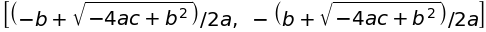

In [35]:
a,b,c = symbols("a,b,c") 
solve(a*x**2+b*x+c, x)
# [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

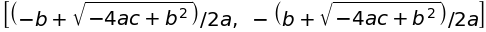

In [36]:
# 使用Eq创建一个方程对象并求解
my_eq=Eq(a*x**2+b*x+c,0)
solve(my_eq,x)
# [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

由于方程的解可能有多组，因此solve()返回一个列表保存所有的解。可以传递包含多个表达式的元组或列表，让solve()对方程组进行求解，得到的解是两层嵌套的列表，其中每个元组表示方程组的一组解

In [37]:
# 对方程组求解（用元组将几个方程组成一个组）
solve((x**2+x*y+1, y ** 2+x*y+2 ), x, y )
# [(-sqrt(3)*I/3, -2*sqrt(3)*I/3), (sqrt(3)*I/3, 2*sqrt(3)*I/3)] 
#有两组解

In [207]:
# 解下列二元一次方程
# 2x-y=3
# 3x+y=7

# 将变量符号化
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

# 解一元一次方程
expr1 = x*2-4
r1 = solve(expr1, x)
r1_eq = solve(Eq(x*2, 4), x)
print("r1:", r1)
print("r1_eq:", r1_eq)

# 解二元一次方程
expr2 = [2*x-y-3, 3*x+y-7]
r2 = solve(expr2, [x, y])
print("r1:", r2)

# 解三元一次方程
f1 = x+y+z-2
f2 = 2*x-y+z+1
f3 = x+2*y+2*z-3
r3 = solve([f1, f2, f3], [x, y, z])
print("r3:", r3)

r1: [2]
r1_eq: [2]
r1: {x: 2, y: 1}
r3: {x: 1, y: 2, z: -1}


In [208]:
# 求解一元二次方程
# from sympy import solve
# x, y, a, b, c = symbols("x y a b c")
expr = x**2-4
solve(expr)

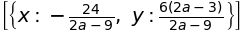

In [209]:
# 求解一元二次符号方程
expr1= a*x+3*y-6
expr2 = 3*x+2*y-12
solve((expr1,expr2),(x,y),dict=True)

In [210]:
# 解二次方程
# x, y, a, b, c = symbols("x y a b c")
expr = x**2-4*x+3
solve(expr,dict=True)

## 解线性方程组-linsolve()

In [9]:
# 默认等式为0的形式
print("======默认等式为0的形式 =======")
eq = [x+y+z-2, 2*x-y+z+1, x+2*y+2*z-3]
result = linsolve(eq, [x, y, z])
print(result)
print(latex(result))

# 矩阵形式
print("======矩阵形式 =======")
eq = Matrix(([1, 1, 1, 2], [2, -1, 1, -1], [1, 2, 2, 3]))
result = linsolve(eq, [x, y, z])
print(result)
print(latex(result))

# 增广矩阵形式
print("======增广矩阵形式 =======")
A1 = Matrix([[1, 1, 1], [2, -1, 1], [1, 2, 2]])
b1 = Matrix([[2], [-1], [3]])
system = A1, b1
result = linsolve(system, x, y, z)
print(result)
print(latex(result))

======默认等式为0的形式 =======
{(1, 2, -1)}
\left\{\left( 1, \  2, \  -1\right)\right\}
======矩阵形式 =======
{(1, 2, -1)}
\left\{\left( 1, \  2, \  -1\right)\right\}
======增广矩阵形式 =======
{(1, 2, -1)}
\left\{\left( 1, \  2, \  -1\right)\right\}


## 解非线性方程组-nonlinsolve()

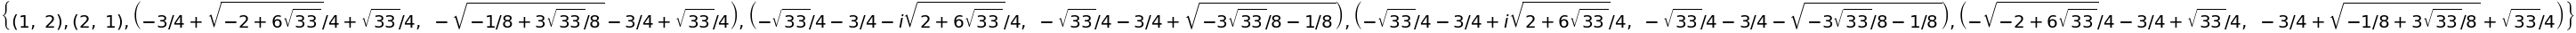

'\\left\\{\\left( 1, \\  2\\right), \\left( 2, \\  1\\right), \\left( - \\frac{3}{4} + \\frac{\\sqrt{-2 + 6 \\sqrt{33}}}{4} + \\frac{\\sqrt{33}}{4}, \\  - \\sqrt{- \\frac{1}{8} + \\frac{3 \\sqrt{33}}{8}} - \\frac{3}{4} + \\frac{\\sqrt{33}}{4}\\right), \\left( - \\frac{\\sqrt{33}}{4} - \\frac{3}{4} - \\frac{i \\sqrt{2 + 6 \\sqrt{33}}}{4}, \\  - \\frac{\\sqrt{33}}{4} - \\frac{3}{4} + \\sqrt{- \\frac{3 \\sqrt{33}}{8} - \\frac{1}{8}}\\right), \\left( - \\frac{\\sqrt{33}}{4} - \\frac{3}{4} + \\frac{i \\sqrt{2 + 6 \\sqrt{33}}}{4}, \\  - \\frac{\\sqrt{33}}{4} - \\frac{3}{4} - \\sqrt{- \\frac{3 \\sqrt{33}}{8} - \\frac{1}{8}}\\right), \\left( - \\frac{\\sqrt{-2 + 6 \\sqrt{33}}}{4} - \\frac{3}{4} + \\frac{\\sqrt{33}}{4}, \\  - \\frac{3}{4} + \\sqrt{- \\frac{1}{8} + \\frac{3 \\sqrt{33}}{8}} + \\frac{\\sqrt{33}}{4}\\right)\\right\\}'

\left\{\left( 1, \  2\right), \left( 2, \  1\right), \left( - \frac{3}{4} + \frac{\sqrt{-2 + 6 \sqrt{33}}}{4} + \frac{\sqrt{33}}{4}, \  - \sqrt{- \frac{1}{8} + \frac{3 \sqrt{33}}{8}} - \frac{3}{4} + \frac{\sqrt{33}}{4}\right), \left( - \frac{\sqrt{33}}{4} - \frac{3}{4} - \frac{i \sqrt{2 + 6 \sqrt{33}}}{4}, \  - \frac{\sqrt{33}}{4} - \frac{3}{4} + \sqrt{- \frac{3 \sqrt{33}}{8} - \frac{1}{8}}\right), \left( - \frac{\sqrt{33}}{4} - \frac{3}{4} + \frac{i \sqrt{2 + 6 \sqrt{33}}}{4}, \  - \frac{\sqrt{33}}{4} - \frac{3}{4} - \sqrt{- \frac{3 \sqrt{33}}{8} - \frac{1}{8}}\right), \left( - \frac{\sqrt{-2 + 6 \sqrt{33}}}{4} - \frac{3}{4} + \frac{\sqrt{33}}{4}, \  - \frac{3}{4} + \sqrt{- \frac{1}{8} + \frac{3 \sqrt{33}}{8}} + \frac{\sqrt{33}}{4}\right)\right\}


<bound method EvalfMixin._evalf of {(1, 2), (2, 1), (-3/4 + sqrt(-2 + 6*sqrt(33))/4 + sqrt(33)/4, -sqrt(-1/8 + 3*sqrt(33)/8) - 3/4 + sqrt(33)/4), (-sqrt(33)/4 - 3/4 - I*sqrt(2 + 6*sqrt(33))/4, -sqrt(33)/4 - 3/4 + sqrt(-3*sqrt(33)/8 - 1/8)), (-sqrt(33)/4 - 3/4 + I*sqrt(2 + 6*sqrt(33))/4, -sqrt(33)/4 - 3/4 - sqrt(-3*sqrt(33)/8 - 1/8)), (-sqrt(-2 + 6*sqrt(33))/4 - 3/4 + sqrt(33)/4, -3/4 + sqrt(-1/8 + 3*sqrt(33)/8) + sqrt(33)/4)}>

In [212]:
# x**2+y**2-5=0
# x**3+y**3-9=0
eq = [x**2 + y**2 - 5, x**3 + y**3 - 9]
result = nonlinsolve(eq, [x, y])
result
latex(result)
print_latex(result)
result._evalf
# 查看具体值
# for rs in result:
#     for r in rs:
#         r.evalf()
#         "*"
#     "**"


In [213]:
# 验证
a1 = -2.18614066163451-1.50970559794013*I
a2 = a1.conjugate() # 共轭复数
b1 = a1**2+a2**2
b2 = a1**3+a2**3
b1.evalf()
b2.evalf()

## 用其它变量求解一个变量

[{x: (b - sqrt(-4*a*c + b**2))/(2*a)}, {x: (b + sqrt(-4*a*c + b**2))/(2*a)}]


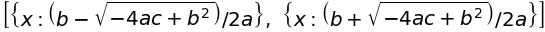

In [215]:
a,b,x,y = symbols('a b x y')
expr = a*x**2-b*x+c
result = solve(expr,x,dict=True)
print(result)
result 


# 微积分  
[Python数据处理篇之Sympy系列(四)---微积分](https://www.cnblogs.com/zyg123/p/10548905.html#四级数展开-series)

1. 求导数-diff()
    1. 一阶求导-diff()
        * 语法是：diff(expr,x)
    2. 多阶求导-diff()
        * 多阶求导同样的使用diff()，其有两种形式
            1. 带参数中，添加几个x,就是对x的几次求导。diff(expr, x, x,x……)
            2. 用数字来控制所求的阶数：diff(expr, x, n)
    3. 求偏导数-diff()  
        * diff()也可以单独对一个变量求导，这便是偏导数。
2. 求积分-integrate()  
    * 求积分有三种形式，并且都用的是integrate（）方法
        1. 求不定积分：integrate(expr, var)
        2. 求定积分：integrate(expr, (var, min, max))
        3. 求多重积分：integrate(expr, (var1, min, max),(var2,min,max))
3. 求极限-limit()
    * 求极限使用limit()，其有下两种使用方法：
        1. 趋进某个点的极限：limit(expr,var,doit）
        2. 从侧边趋进某个值的极限：limit(expr,var,doit, "+") （左侧趋进同理）
4. 级数展开-series()
    * 说明：
        级数展开请使用：series(expr, x0, xn）,使用.removeO()去除尾数。


## 极限

In [98]:
from sympy import limit, Limit, S, oo
x = Symbol('x')
expr = (1+1/x)**x
limit(1/x,x,+oo,dir='-')
L = Limit(1/x,x,S.Infinity,dir='-')
L
L.doit()
Limit(expr,x,oo).doit()

# S.Infinity和oo都为正无穷

In [84]:
x = Symbol('x')
f1 = sin(x) / x
limit(f1, x, 0)
f2 = (1 + 1 / x) ** x
limit(f2, x, oo)


###### 连续复利

In [85]:
n = Symbol('n')
limit((1+1/n)**n,n,oo)
E1 = Limit((1+1/n)**n,n,oo)
e1 = E1.doit()
E1
e1
sympy.E

In [86]:
p, r, t = symbols('p r t',positive=True)
limit(p*(1+r/n)**(n*t), n, oo)

## 函数求导
* diff()
* Derivative  
***
1. Derivative是表示导函数的类，它的第一个参数是需要进行求导的数学函数，第二个参数是求导的自变量.注意Derivative所得到的是一个导函数，它并不会进行求导运算  
1. 如果希望它进行实际的运算，计算出导函数，可以调用其doit()方法  
1. 也可以直接使用diff()函数或表达式的diff()方法来计算导函数
1. 使用Derivative对象可以表示自定义的数学函数的导函数
1. 由于SymPy不知道如何对自定义的数学函数进行求导，因此它的diff()方法会返回和上面相同的结果
1. 添加更多的符号参数可以表示高阶导函数  
1. 也可以表示多个变量的导函数

In [87]:
from sympy import diff, Derivative

In [4]:
x,y = symbols('x y')

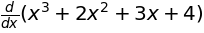

In [89]:
z = x**3+2*x**2+3*x+4
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
diff(z,x)

### 求偏导数

In [90]:
z = x**2+2*x*y+3*y**2
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
d.doit().subs({x:1,y:2})
diff(z,x)
diff(z,y)

### 高阶导数

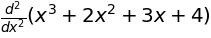

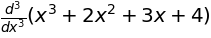

In [91]:
z = x**3+2*x**2+3*x+4
diff(z,x,2)
diff(z,x,3)
Derivative(z,x,2)
Derivative(z,x,3)
Derivative(z,x,2).doit()
Derivative(z,x,3).doit()

### 高阶偏导数

In [9]:
z = x**2+2*x*y+3*y**2
z
Derivative(z,x,y).doit()

x**2 + 2*x*y + 3*y**2

2

### 最值

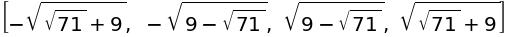

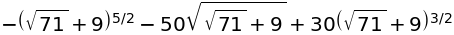

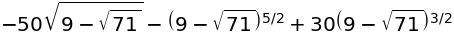

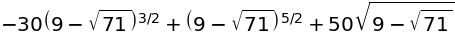

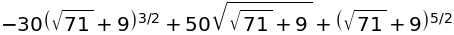

In [92]:
z = x**5-30*x**3+50*x
x_min = -5
x_max = -5
d1 = diff(z,x)
s1 = solve(d1)
s1 = sorted(s1)
s1
z.subs({x:s1[0]})
z.subs({x:s1[1]})
z.subs({x:s1[2]})
z.subs({x:s1[3]})
z.subs({x:s1[0]}).evalf()
z.subs({x:s1[1]}).evalf()
z.subs({x:s1[2]}).evalf()
z.subs({x:s1[3]}).evalf()

## 积分
* Integral
* integrate

In [93]:
from sympy import integrate, Integral

In [94]:
x,y,z = symbols('x y z')

### 不定积分

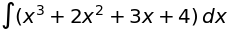

In [95]:
f = x**3+2*x**2+3*x+4
integrate(f, x)
Integral(f, x)
Integral(f, x).doit()

### 定积分    
as_sum()方法可以将定积分转换为近似求和公式，它将积分区域分割成N个小矩形的面积之和

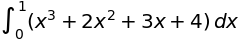

In [141]:
f = x**3+2*x**2+3*x+4
integrate(f,(x,0,1))
Integral(f,(x,0,1))
Integral(f,(x,0,1)).doit()
Integral(f,(x,0,1)).as_sum(5)
I

In [97]:
f = exp(-x**2)
integrate(f,(x,-oo,oo))

In [98]:
# 标准正态分布
t = symbols('t')
f = (1/((2*pi)**(0.5))*exp(-t**2/2))
integrate(f,(t,-oo,oo)).evalf()
integrate(f,(t,-oo,x)).evalf()
integrate(f,(t,-oo,0.1)).evalf()
integrate(f,(t,-0.1,0.1)).evalf()

### 二重积分

##### 二重不定积分

In [99]:
f = x+y
integrate(f, x, y)
integrate(f, x, x)
# Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

##### 二重定积分


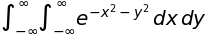

In [100]:
f = exp(-x**2 - y**2)
integrate(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

### 三重积分

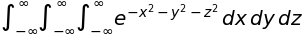

In [101]:
f = exp(-x**2 - y**2 - z**2)
integrate(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo)).doit()

### 概率密度

⎧   2                   
⎪3⋅x                    
⎪────  for x ≥ 1 ∧ x ≤ 2
⎨ 7                     
⎪                       
⎪ 0        otherwise    
⎩                       

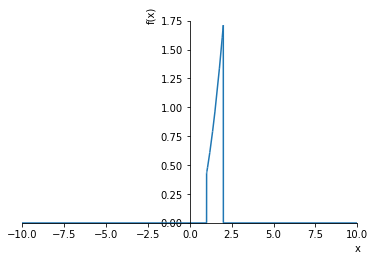

In [102]:
i1 = integrate(x**2,(x,1,2))
f = Piecewise(((1/i1)*x**2,(x>=1) & (x<=2)),(0, True))
f
integrate(f,(x,-oo,oo))
plot(f)

### 重要积分函数

* 误差函数erf()
    $$erf(x)=\frac{2}{\sqrt{\pi}} \int_0^x {e^{-\eta^{2}} d\eta}$$
* 正弦积分函数Si()
    $$Si(x)=\int_0^x{\frac{\sin(t)}{t}dt}\quad x>0$$
* 伽玛函数gamma()
    $$Gamma(x)=\int_0^\infty{t^{x-1}e^{-t}dx\quad(x>0)}$$

In [41]:
erf(x)
Si(x)
gamma(x)

In [52]:
# erf
(2/sqrt(pi))*Integral(exp(-t**2), (t, 0, x)).doit()
# Si
Integral(sin(t)/t, (t, 0, x)).doit()
Integral(sin(t)/t, (t, 0, oo)).doit()
# Gamma
Integral(t**(x-1)*exp(-t), (t, 0, oo)).doit()


⎧     Γ(x)        for re(x) - 1 > -1
⎪                                   
⎪∞                                  
⎪⌠                                  
⎨⎮  x - 1  -t                       
⎪⎮ t     ⋅ℯ   dt      otherwise     
⎪⌡                                  
⎪0                                  
⎩                                   

## 级数

### 幂级数

#### 级数展开

In [128]:
# from sympy.abc import s
from sympy import summation
x,n,s= symbols("x n s")
s1 = summation(x**n/n,(n,1,5))
s1
s1.subs({x:1})

In [99]:
# 初始化
x = symbols('x')
# 表达式
expr1 = exp(sin(x))
# 级数展开
r1 = expr1.series(x, 0, 6)
# 去除尾数
r2 = expr1.series(x, 0, 6).removeO()
expr1
r1
r2

In [103]:
# from sympy import series, re, im
x = symbols('x')
s = series(exp(I * x), x, 0, 10)
s
print(re(s))
print(im(s))
# re(s) # 级数的实部
# im(s) # 级数的虚部

-re(x)**8*im(x)/40320 + re(x)**8/40320 + re(x)**6*im(x)**3/4320 - re(x)**6*im(x)**2/1440 + re(x)**6*im(x)/720 - re(x)**6/720 - re(x)**4*im(x)**5/2880 + re(x)**4*im(x)**4/576 - re(x)**4*im(x)**3/144 + re(x)**4*im(x)**2/48 - re(x)**4*im(x)/24 + re(x)**4/24 + re(x)**2*im(x)**7/10080 - re(x)**2*im(x)**6/1440 + re(x)**2*im(x)**5/240 - re(x)**2*im(x)**4/48 + re(x)**2*im(x)**3/12 - re(x)**2*im(x)**2/4 + re(x)**2*im(x)/2 - re(x)**2/2 + re(O(x**10)) - im(x)**9/362880 + im(x)**8/40320 - im(x)**7/5040 + im(x)**6/720 - im(x)**5/120 + im(x)**4/24 - im(x)**3/6 + im(x)**2/2 - im(x) + 1
re(x)**9/362880 - re(x)**7*im(x)**2/10080 + re(x)**7*im(x)/5040 - re(x)**7/5040 + re(x)**5*im(x)**4/2880 - re(x)**5*im(x)**3/720 + re(x)**5*im(x)**2/240 - re(x)**5*im(x)/120 + re(x)**5/120 - re(x)**3*im(x)**6/4320 + re(x)**3*im(x)**5/720 - re(x)**3*im(x)**4/144 + re(x)**3*im(x)**3/36 - re(x)**3*im(x)**2/12 + re(x)**3*im(x)/6 - re(x)**3/6 + re(x)*im(x)**8/40320 - re(x)*im(x)**7/5040 + re(x)*im(x)**6/720 - re(x)*im(x)**5

In [104]:
series(cos(x), x, 0, 10) # 10为余项次数

In [105]:
series(sin(x)) # 默认余项次数为6，在 x=0 处展开

In [106]:
series(exp(x), x, 1, n= 3)#在 x=1 处展开，余项次数为3

In [107]:
sin(x).series(x,0,n=4)

#### 级数求和

In [108]:
from sympy import var, summation
i, n = var("i n") # Create symbols and inject them into the global namespace.
summation(i, (i, 1, n)) # summation函数用于级数求和

In [121]:
summation(1/n, (n, 1, +oo)) # 调和级数，发散

⎧  ζ(r)     for r > 1
⎪                    
⎪  ∞                 
⎪ ___                
⎪ ╲                  
⎨  ╲    -r           
⎪  ╱   n    otherwise
⎪ ╱                  
⎪ ‾‾‾                
⎪n = 1               
⎩                    

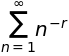

In [124]:
r = symbols('r')
summation(1/n**r, (n, 1, +oo)) # 仅当r>1时 收敛
Sum(1/n**r, (n, 1, +oo))

#### 判断级数敛散性
计算某个级数是发散的，还是收敛的，就可以使用 is_convergence 函数

In [120]:
n = Symbol("n", integer=True)
Sum(1/n, (n,1,sympy.oo)).is_convergent()
Sum(1/n**2, (n,1,sympy.oo)).is_convergent()

False

True

### 傅里叶级数

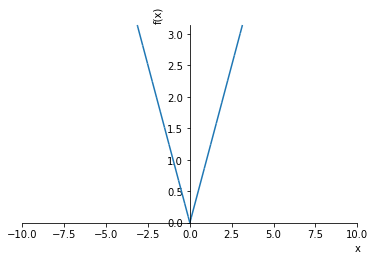

In [111]:
from sympy import fourier_series, plot
f = Piecewise((x,(x>0) & (x<pi)),(-x,(x<0) & (x>-pi)))
plot(f)
fourier_series(f, (x, -pi, pi)).truncate(8)#截断

In [112]:
s = fourier_series(x**2, (x, -pi, pi))
s
s.evalf()
# dir(s)

s.scale(2).truncate() # y幅度
s.scalex(2).truncate() # x幅度
s = fourier_series(x, (x, -pi, pi))
s
s.shift(1).truncate() # y平移
s.shiftx(1).truncate() # x平移

In [113]:
from sympy.integrals import fourier_transform
from sympy.integrals import laplace_transform

f1 = fourier_transform(exp(-x**2), x, k)
f1
f2 = laplace_transform(sin(x),x,f)
f2


⎛⎧  1                                                    ⎞
⎜⎪──────  for (x > 0 ∧ x < π) ∨ (x > -π ∧ x < 0)         ⎟
⎜⎨ 2                                            , 0, True⎟
⎜⎪x  + 1                                                 ⎟
⎝⎩                                                       ⎠

In [114]:
s,t = symbols("s t")
f = exp(-t**2)
f = sin(x)
f
integrate(f*exp(-s*7),(t,0,+oo))

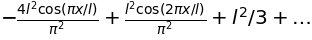

In [115]:
n,l = symbols("n l")
s = fourier_series(x**2, (x, -l, l))
s
s1 = s.subs({l:pi})
s1.truncate(10)

s2 = s1.truncate(100).subs({x:2})
s2.evalf()

# summation(s1,(x,0,+oo))

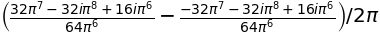

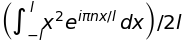

In [116]:
from sympy import I
f = x**2
n,l = symbols("n l")
# n=2
s = (1/(2*l))*integrate(f*exp(n*pi*x*I/l),(x,-l, l))
cn = simplify(s.subs({l:pi}))
sn = cn*exp(n*pi*x*I/l)
s1 = s.subs({l:pi,n:2})
s1
simplify(s1)
(1/(2*l))*Integral(f*exp(n*pi*x*I/l),(x,-l, l))
sn.subs({n:2})

In [117]:
sns = 0
for n_ in range(-100,100):
    sns+=sn.subs({l:pi,x:2,n:n_})
sns.evalf()

In [118]:
e1 = exp(-8*pi*I)
e1

![](https://gss3.bdstatic.com/7Po3dSag_xI4khGkpoWK1HF6hhy/baike/pic/item/b7fd5266d01609246cd3815fd50735fae7cd34fb.jpg)

# 微分方程  
[用 Python 来研究数学 --- SymPy 符号工具包介绍](https://zhuanlan.zhihu.com/p/96738286?utm_source=wechat_session)  


## 常微分方程  
dsolve()可以对微分方程进行符号求解。它的第一个参数是一个带未知函数的表达式，第 二个参数是需要进行求解的未知函数。例如下面的程序对微分方程 进行求解。 得到的结果是一个自然指数函数，它有一个待定系数c1。


例如下面对微分方程:${df\over dx}+f(x)+f^2(x)=0,$进行求解。得到的结果是一个一般方程，它描述了f(x)和自变量之间的关系。一般把这种函数称为隐函数

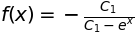

In [38]:
x = symbols("x", real=True) # 定义符号x 为实数
eq1 = dsolve(f(x).diff(x) + f(x)**2 + f(x), f(x))
eq1
# f(x) == -C1/(C1 - exp(x))

用dsolve()解微分方程时可以传递一个hint参数，指定微分方程的解法。该参数的默认值为“default”,表示由SymPy自动挑选解法。可以将hint参数设置为“best”，让dsolve()尝试所有己知解法，并返回最简单的解。  
如果设置hint参数为“best”,就能得到更简单的显函数表达式：

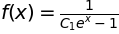

In [39]:
eq2 = dsolve(f(x).diff(x) + f(x)**2 + f(x), f(x), hint="best")
eq2
# f(x) == -C1/(C1 - exp(x))

### SymPy 的 ODE 工具  
在常微分方程（Ordinary Differential Equation）中，最常见的就是解方程，而解方程主要是靠 dsolve 函数。例如想求解以下的常微分方程：  
${df\over dx}+f(x)=0,\\
{d^2f\over dx^2}+f(x)=0,\\
{d^3f\over dx^3}+f(x)=0
$


In [142]:
f = Function('f')
dsolve(Derivative(f(x),x) + f(x), f(x))
# Eq(f(x), C1*exp(-x))
dsolve(Derivative(f(x),x,2) + f(x), f(x))
# Eq(f(x), C1*sin(x) + C2*cos(x))
dsolve(Derivative(f(x),x,3) + f(x), f(x))
# Eq(f(x), C3*exp(-x) + (C1*sin(sqrt(3)*x/2) + C2*cos(sqrt(3)*x/2))*sqrt(exp(x)))

而常微分方程对于不同的方程类型也有着不同的解法，可以使用 classify_ode 来判断常微分方程的类型

In [137]:
classify_ode(sympy.Derivative(f(x),x) + f(x), f(x))
# ('separable', '1st_exact', '1st_linear', 'almost_linear', '1st_power_series', 'lie_group', 'nth_linear_constant_coeff_homogeneous', 'separable_Integral', '1st_exact_Integral', '1st_linear_Integral', 'almost_linear_Integral')
classify_ode(sympy.Derivative(f(x),x,2) + f(x), f(x))
# ('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')
classify_ode(sympy.Derivative(f(x),x,3) + f(x), f(x))
# ('nth_linear_constant_coeff_homogeneous',)

('separable',
 '1st_exact',
 '1st_linear',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'almost_linear_Integral')

('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')

('nth_linear_constant_coeff_homogeneous',)

## 偏微分方程  


### SymPy 的 PDE 工具  
在偏微分方程（Partitial\ Differential\ Equation）中，同样可以直接求解和判断偏微分方程的类型，分别使用函数 pdsolve() 和 classify_pde()。假设f(x,y)是一个二元函数，分别满足以下偏微分方程：
$
{\partial f\over \partial x}+{\partial f\over \partial y}=0\\
{\partial f\over \partial x}+{\partial f\over \partial y}+f=0\\
{\partial f\over \partial x}+{\partial f\over \partial y}+f+10=0
$

In [134]:
f = Function("f")(x,y)
pdsolve(sympy.Derivative(f,x)+sympy.Derivative(f,y),f)
# Eq(f(x, y), F(x - y))
pdsolve(f.diff(x)+f.diff(y)+f,f)
# Eq(f(x, y), F(x - y)*exp(-x/2 - y/2))
pdsolve(f.diff(x)+f.diff(y)+f+10,f)
# Eq(f(x, y), F(x - y)*exp(-x/2 - y/2) - 10)

查看类型就用 classify_pde() 函数  
不过目前的 PDE 解法貌似只支持一阶偏导数，二阶或者以上的偏导数就不支持了。

In [135]:
classify_pde(f.diff(x)+f.diff(y)+f)
# ('1st_linear_constant_coeff_homogeneous',)
classify_pde(f.diff(x)+f.diff(y)+f+10,f)
# ('1st_linear_constant_coeff', '1st_linear_constant_coeff_Integral')
classify_pde(f.diff(x)+f.diff(y)+f+10,f)
# ('1st_linear_constant_coeff', '1st_linear_constant_coeff_Integral')

('1st_linear_constant_coeff_homogeneous',)

('1st_linear_constant_coeff', '1st_linear_constant_coeff_Integral')

('1st_linear_constant_coeff', '1st_linear_constant_coeff_Integral')

# 集合
FiniteSet

### 构建集合

In [6]:
from sympy import FiniteSet
from fractions import Fraction # 分数

Fraction(1, 5)

In [120]:
s = FiniteSet(2,4,6, Fraction(1,5))
s
len(s)
3 in s

False

In [121]:
# 创建一个空集合
s = FiniteSet()
s

In [122]:
# 通过列表或元组创建集合
members= [1,2,3]
s = FiniteSet(*members)
s

##### 集合的重复与排序

In [123]:
s = FiniteSet(2,4,6,2)
s
for s_ in s:
    print(s_)

2
4
6


In [124]:
s1 = FiniteSet(2,4,6)
s2 = FiniteSet(6,4,2)
s1 == s2

True

### 子集、超集与幂集
* 子集: is_subset()
* 超集: is_superset()
* 幂集: powerset()

In [125]:
s = FiniteSet(1)
t = FiniteSet(1,2,3,4)
# 子集
s.is_subset(t)
t.is_subset(s)
# 超集
s.is_superset(t)
t.is_superset(s)
# 幂集
ps = t.powerset()
ps
len(ps)
# 真子集
s.is_proper_subset(t)
# 真超集
t.is_proper_superset(s)

True

False

False

True

True

True

### 集合运算
* 并集和交集  
    * union
    * intersection
* 笛卡尔积
    * *(乘法运算符号)

##### 并集和交集

In [126]:
s = FiniteSet(1,2,3)
t = FiniteSet(2,4,6)
u = FiniteSet(3,5,7)
s.union(t)
s.intersection(t)
# 三个集合的并集
s.union(t).union(u)

##### 笛卡尔积

In [127]:
s = FiniteSet(1,2)
t = FiniteSet(3,4)
p = s*t
p
len(p)
for p_ in p:
    print(p_)

(1, 3)
(1, 4)
(2, 3)
(2, 4)


##### 集合与自身的笛卡尔乘积

In [128]:
s = FiniteSet(1,2)
p = s**3
p
len(p)
for p_ in p:
    print(p_)

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)


In [129]:
from sympy import pi
def time_period(length,g):
    T = 2*pi*(length/g)**0.5
    return T
if __name__=='__main__':
    L = FiniteSet(15,18,21,22.5,25)
    g_values = FiniteSet(9.8,9.78,9.83)
    for elem in L*g_values:
        l = elem[0]
        g = elem[1]
        t = time_period(l/100,g)
        print('{0:^15}{1:^15}{2:^15.3f}'.format(float(l),float(g),float(t)))


     15.0           9.78           0.778     
     15.0            9.8           0.777     
     15.0           9.83           0.776     
     18.0           9.78           0.852     
     18.0            9.8           0.852     
     18.0           9.83           0.850     
     21.0           9.78           0.921     
     21.0            9.8           0.920     
     21.0           9.83           0.918     
     22.5           9.78           0.953     
     22.5            9.8           0.952     
     22.5           9.83           0.951     
     25.0           9.78           1.005     
     25.0            9.8           1.004     
     25.0           9.83           1.002     


# 概率

* 均匀分布
    * random.uniform
    * np.random.uniform

###### 估计一个圆的面积

In [130]:
N=0
M=100000
for i in range(M):
    x1 = random.uniform(-1,1)
    y1 = random.uniform(-1,1)
    r1 = x1**2+y1**2
    if r1<=1 :
        N+=1
(N/M)*4

### 文氏图
pip install matplotlib-venn

In [131]:
from matplotlib_venn import venn2,venn2_circles

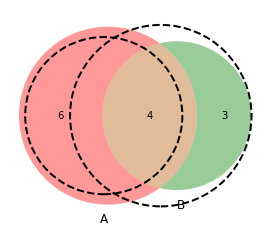

In [132]:
s1 = FiniteSet(*range(1,20,2))
s2 = FiniteSet(*range(1,20,3))
s1
s2
venn2(subsets=[s1,s2], set_labels = ('A', 'B'))
# dir(venn2())
c = venn2_circles(subsets=(1, 2, 2), linestyle='dashed')

### random
* random.shuffle() 方法将序列的所有元素随机排序。
* random.choice() 方法返回一个列表，元组或字符串的随机项。

In [133]:
x1 = list(range(10))
# 复制列表
y1 = x1[:]
z1 = x1.copy()
random.shuffle(x1)
x1
len(x1)
y1
z1
random.choice(x1)

#### 洗牌
* random.shuffle()

In [134]:
# 牌类
class Card:
    def __init__(self,suit,rank):
        self.suit = str(suit)
        self.rank = int(rank)


In [135]:
# 设定牌
suits = FiniteSet(*"ABCD")
suits
ranks = FiniteSet(*range(1,14))
ranks
cards = suits*ranks
cards

In [136]:
cardlist=[]
for i,card in enumerate(cards):
    cardlist.append(Card(card[0],card[1]))

In [137]:
# 洗牌
random.shuffle(cardlist)
# cardlist

### 类列表按属性排序
operator

In [138]:
# 理牌
import operator
cardlist1 = cardlist[:13]
cmpfun = operator.attrgetter('rank')#参数为排序依据的属性，可以有多个，这里优先id，使用时按需求改换参数即可
cardlist1.sort(key=cmpfun)#使用时改变列表名即可
for l1 in cardlist1:
    "{0}{1}".format(l1.suit,l1.rank)

'A1'

'B2'

'C2'

'D2'

'C3'

'D5'

'B5'

'A7'

'C7'

'A9'

'C10'

'A12'

'D12'

# 矩阵

## Creating Matrices

In [21]:
#构造完整矩阵
M1 = Matrix([[1, 0, 0], [0, 0, 0]])
M1
#为矩阵添加行
Matrix([M1, (0, 0, -1)])
#构造行矩阵
Matrix([[1, 2, 3]])
#构造列矩阵
Matrix([1, 2, 3])  # 特别关注这个
#用列表构造指定形状矩阵
Matrix(2, 3, [1, 2, 3, 4, 5, 6])

⎡1  0  0⎤
⎢       ⎥
⎣0  0  0⎦

⎡1  0  0 ⎤
⎢        ⎥
⎢0  0  0 ⎥
⎢        ⎥
⎣0  0  -1⎦

[1  2  3]

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [22]:
# 用函数构造矩阵
def f1(i, j):
    if i == j:
        return 1
    else:
        return 0


Matrix(4, 4, f1)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [23]:
# lambda函数构造矩阵
Matrix(3, 4, lambda i,j: 1 - (i+j) % 2)

⎡1  0  1  0⎤
⎢          ⎥
⎢0  1  0  1⎥
⎢          ⎥
⎣1  0  1  0⎦

In [79]:
# 构造单位矩阵
eye(4)
# 构造全零方阵
zeros(2)
# 构造全一矩阵
ones(3)
# 构造指定形状的矩阵
zeros(2, 5)
ones(1, 3)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

⎡0  0  0  0  0⎤
⎢             ⎥
⎣0  0  0  0  0⎦

[1  1  1]

In [80]:
# 构造对角矩阵
diag(1,2,3,4)
diag(1,2,Matrix([[1, 2], [3, 4]]))

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  3  0⎥
⎢          ⎥
⎣0  0  0  4⎦

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  1  2⎥
⎢          ⎥
⎣0  0  3  4⎦

## Basic Manipulation

In [82]:
M1 = Matrix(2, 3, [1, 2, 3, 4, 5, 6])
M1
# 当成一维数组访问
M1[4]
# 通过具体下标访问
M1[1, 2]
# 切片
M1[0:2, 0:2]
# 无法访问不存在的数据，除非切片（返回空值）
M1[8:]

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡1  2⎤
⎢    ⎥
⎣4  5⎦

In [83]:
#对切片赋值
M1 = Matrix(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
M1
M1[2:,2:] = Matrix(2,2,lambda i,j: 0)
M1

⎡1   2   3   4 ⎤
⎢              ⎥
⎢5   6   7   8 ⎥
⎢              ⎥
⎢9   10  11  12⎥
⎢              ⎥
⎣13  14  15  16⎦

⎡1   2   3  4⎤
⎢            ⎥
⎢5   6   7  8⎥
⎢            ⎥
⎢9   10  0  0⎥
⎢            ⎥
⎣13  14  0  0⎦

In [84]:
# 矩阵的加减乘乘方操作
M1 = Matrix(([1, 2, 3], [1, 3, 2], [2, 3, 1]))
M2 = diag(1, Matrix([[1, 2], [3, 4]]))
M1
M2
M1 + M2
M1 - M2
M1 * M2  # 矩阵乘法
M1**2
2*M1

⎡1  2  3⎤
⎢       ⎥
⎢1  3  2⎥
⎢       ⎥
⎣2  3  1⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  3  4⎦

⎡2  2  3⎤
⎢       ⎥
⎢1  4  4⎥
⎢       ⎥
⎣2  6  5⎦

⎡0  2  3 ⎤
⎢        ⎥
⎢1  2  0 ⎥
⎢        ⎥
⎣2  0  -3⎦

⎡1  11  16⎤
⎢         ⎥
⎢1  9   14⎥
⎢         ⎥
⎣2  6   10⎦

⎡9  17  10⎤
⎢         ⎥
⎢8  17  11⎥
⎢         ⎥
⎣7  16  13⎦

⎡2  4  6⎤
⎢       ⎥
⎢2  6  4⎥
⎢       ⎥
⎣4  6  2⎦

In [46]:
# 删除矩阵的行列
M1 = Matrix(([1,2,3],[4,5,6],[7,8,9]))
# 删除行
M1.row_del(0)
M1
# #删除列
M1.col_del(0)
M1

⎡4  5  6⎤
⎢       ⎥
⎣7  8  9⎦

⎡5  6⎤
⎢    ⎥
⎣8  9⎦

In [50]:
# 添加矩阵的行列
M1 = eye(3)
M2 = zeros(3, 4)
#增加行
M1.row_join(M2)
M3 = zeros(4, 3)
#增加列
M1.col_join(M3)

⎡1  0  0  0  0  0  0⎤
⎢                   ⎥
⎢0  1  0  0  0  0  0⎥
⎢                   ⎥
⎣0  0  1  0  0  0  0⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [48]:
v1 = Matrix([1,2,3])
v2 = Matrix([4,5,6])
# 向量积
v3 = v1.cross(v2)
# 数量积
v1.dot(v2)
v1
v2
v3

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

⎡4⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣6⎦

⎡-3⎤
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎣-3⎦

In [53]:
#对矩阵元素应用函数
f1 = lambda x: 2*x
eye(3).applyfunc(f1)
f1(eye(3))

⎡2  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  2⎦

⎡2  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  2⎦

In [55]:
#subs对矩阵元素进行替换
M1 = eye(3) * x
M1.subs(x, 4)

⎡4  0  0⎤
⎢       ⎥
⎢0  4  0⎥
⎢       ⎥
⎣0  0  4⎦

## Linear algebra

[SymPy学习之Matrices (linear algebra)](https://blog.csdn.net/triagen/article/details/63821344)

In [56]:
#计算矩阵行列式
M1 = Matrix(( [1, 2, 3], [3, 6, 2], [2, 0, 1] ))
M1.det()

M2 = eye(3)
M2.det()

M3 = Matrix(( [1, 0, 0], [1, 0, 0], [1, 0, 0] ))
M3.det()


In [58]:
#矩阵求逆
M1.inv(method="GE") 
M1.inv(method="LU") # method : ('GE', 'LU', or 'ADJ')
M1.inv(method="ADJ") 
M1 * M1.inv(method="LU")


⎡-3/14  1/14  1/2 ⎤
⎢                 ⎥
⎢-1/28  5/28  -1/4⎥
⎢                 ⎥
⎣ 3/7   -1/7   0  ⎦

⎡-3/14  1/14  1/2 ⎤
⎢                 ⎥
⎢-1/28  5/28  -1/4⎥
⎢                 ⎥
⎣ 3/7   -1/7   0  ⎦

⎡-3/14  1/14  1/2 ⎤
⎢                 ⎥
⎢-1/28  5/28  -1/4⎥
⎢                 ⎥
⎣ 3/7   -1/7   0  ⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [77]:
# 伴随矩阵
M1.adjugate(method="berkowitz")
M1.det()
M1*M1.adjugate(method="berkowitz")

⎡-3  7   -5⎤
⎢          ⎥
⎢3   -5  1 ⎥
⎢          ⎥
⎣-3  1   1 ⎦

⎡-6  0   0 ⎤
⎢          ⎥
⎢0   -6  0 ⎥
⎢          ⎥
⎣0   0   -6⎦

In [59]:
#LUsolve解方程
A1 = Matrix([[2, 3, 5], [3, 6, 2], [8, 3, 6]])
x1 = Matrix(3,1,[3,7,5])
b1 = A1*x1
soln = A1.LUsolve(b1)
soln


⎡3⎤
⎢ ⎥
⎢7⎥
⎢ ⎥
⎣5⎦

## randMatrix
randMatrix(r, c=None, min=0, max=99, seed=None, symmetric=False, percent=100, prng=None)

In [64]:
from sympy import randMatrix

In [70]:
randMatrix(3)
randMatrix(3, 2)
randMatrix(3, 3, 0, 9)
randMatrix(3, symmetric=True)
randMatrix(3, seed=1)
randMatrix(3, symmetric=True, percent=50)

⎡29  7   68⎤
⎢          ⎥
⎢20  69  94⎥
⎢          ⎥
⎣67  68  67⎦

⎡70  47⎤
⎢      ⎥
⎢29  38⎥
⎢      ⎥
⎣85  96⎦

⎡4  4  4⎤
⎢       ⎥
⎢6  6  2⎥
⎢       ⎥
⎣9  2  0⎦

⎡64  67  62⎤
⎢          ⎥
⎢67  85  51⎥
⎢          ⎥
⎣62  51  27⎦

⎡17  72  97⎤
⎢          ⎥
⎢8   32  15⎥
⎢          ⎥
⎣63  97  57⎦

⎡0   0   41⎤
⎢          ⎥
⎢0   92  54⎥
⎢          ⎥
⎣41  54  0 ⎦

sympy.matrices.dense.MutableDenseMatrix

# 逻辑符号  
[Sympy玩转逻辑符号运算](https://www.jianshu.com/p/039bfcac74c6)

# 结尾